In [1]:
%load_ext autoreload
%autoreload 2
import pinot

Using backend: pytorch
/Users/wangy1/anaconda3/envs/pinot/lib/python3.7/site-packages/dgl/base.py:45: DGLWarning: Detected an old version of PyTorch. Suggest using torch>=1.5.0 for the best experience.
  return warnings.warn(message, category=category, stacklevel=1)


In [19]:
ds = pinot.data.moonshot()
ds = pinot.data.utils.batch(ds, len(ds))
ds = pinot.data.datasets.Dataset(ds)

/Users/wangy1/anaconda3/envs/pinot/lib/python3.7/site-packages/dgl/base.py:45: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  return warnings.warn(message, category=category, stacklevel=1)


In [98]:
ds = pinot.data.moonshot_with_date()

In [87]:
import torch
layer = pinot.representation.dgl_legacy.gn(model_name='GraphConv')
representation = pinot.representation.Sequential(
    layer=layer,
    config=[32, 'tanh', 32, 'tanh', 2, 'tanh']
)
output_regressor = pinot.regressors.NeuralNetworkRegressor
net = pinot.Net(
    representation=representation,
    output_regressor_class=output_regressor
)
optimizer = torch.optim.Adam(net.parameters(), 1e-5)

experiment = pinot.Train(
    net=net,
    data=ds,
    optimizer=optimizer,
    n_epochs=1000,
)

In [89]:
experiment.train()

In [47]:
g, y = next(iter(ds))

In [93]:
x = net.representation.forward(g)

In [96]:
net.representation.

['d0', 'a1', 'd2', 'a3', 'd4', 'a5']

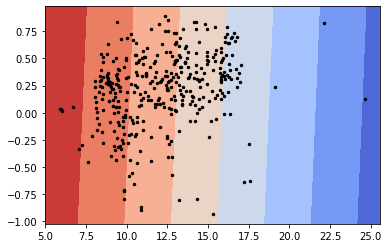

In [90]:
from matplotlib import pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1)
ax.scatter(
    x[:, 0].detach(), 
    x[:, 1].detach(),
    color='black',
    s=6,
)
ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()

xx, yy = np.meshgrid(
    np.linspace(xmin, xmax, 100),
    np.linspace(ymin, ymax, 100)
)

z_all = net.output_regressor.condition(
    torch.tensor(xy_all, dtype=torch.float32)
).mean.reshape([100, 100]).detach().numpy()

ax.contourf(
    xx,
    yy,
    z_all,
    cmap="coolwarm",
    zorder=0,
)



In [1]:
# semisupervised vae on lead series organized on space

In [64]:
xy_all = np.stack(
    [xx, yy],
    axis=2,
).reshape([-1, 2])

In [60]:
net

Net(
  (representation): Sequential(
    (f_in): Sequential(
      (0): Linear(in_features=117, out_features=128, bias=True)
      (1): Tanh()
    )
    (d0): GN(
      (gn): GraphConv(in=128, out=32, normalization=both, activation=None)
    )
    (d2): GN(
      (gn): GraphConv(in=32, out=32, normalization=both, activation=None)
    )
    (d4): GN(
      (gn): GraphConv(in=32, out=2, normalization=both, activation=None)
    )
  )
  (output_regressor): NeuralNetworkRegressor(
    (_output_regression): ModuleList(
      (0): Linear(in_features=2, out_features=1, bias=True)
      (1): Linear(in_features=2, out_features=1, bias=True)
    )
  )
)

In [86]:
net.output_regressor._output_regression[0].weight

Parameter containing:
tensor([[0.0171, 0.6134]], requires_grad=True)